In [42]:
import pandas as pd
import os

In [43]:
from scipy.stats import friedmanchisquare, wilcoxon

conditions = {
    0: 'No Music',
    1: 'Non Sync',
    2: 'Sync'
}

pos_enjoyment_cols = [
    'experience_fun',
    'experience_interesting',
    'enjoyed_experience',
    'enjoy_exercising_more',
    'willing_to_do_again',
    'enjoyed_experience_2',
    'activity_enjoyable'
]

neg_enjoyment_cols = [
    'boring_experience',
    'did_not_hold_attention'
]


exertion_col = 'exertion'

enjoyment_df = pd.DataFrame(columns=['player', 'condition','score', 'enjoyment', 'exertion'])

for c_i, condition in conditions.items():
    path = os.path.join('../ProcessedData', condition, 'post_df.csv')
    df = pd.read_csv(path)
    for _, row in df.iterrows():
        enjoyment_score = row[pos_enjoyment_cols].sum() - row[neg_enjoyment_cols].sum()
        exertion_score = row[exertion_col]
        player_id = row['index'] + 1
        game_df = pd.read_csv(os.path.join('../FishingGame', condition, f"{player_id}.csv"))
        score = game_df['score'].max()
        new_row = {'player': int(player_id), 'condition': int(c_i), 'score':int(score), 'enjoyment': float(enjoyment_score), 'exertion': float(exertion_score)}
        enjoyment_df = pd.concat([enjoyment_df, pd.DataFrame([new_row])], ignore_index=True)

enjoyment_df = enjoyment_df.astype({'player': 'Int64', 'condition': 'Int64', 'score': 'Int64', 'enjoyment': 'float', 'exertion': 'float'})

print(enjoyment_df)


enjoyment_wide = enjoyment_df.pivot(index='player', columns='condition', values='enjoyment')
exertion_wide = enjoyment_df.pivot(index='player', columns='condition', values='exertion')
print(enjoyment_wide)
print(exertion_wide)

# Friedman's test for enjoyment
stat_enjoy, p_enjoy = friedmanchisquare(
    enjoyment_wide[0], enjoyment_wide[1], enjoyment_wide[2]
)
print(f"Friedman's test for enjoyment: statistic={stat_enjoy:.3f}, p-value={p_enjoy:.4f}")

# Friedman's test for exertion
stat_exert, p_exert = friedmanchisquare(
    exertion_wide[0], exertion_wide[1], exertion_wide[2]
)
print(f"Friedman's test for exertion: statistic={stat_exert:.3f}, p-value={p_exert:.4f}")

# Wilcoxon signed-rank test for No Music vs Sync
diff = enjoyment_wide[0] - enjoyment_wide[2]
if (diff != 0).any():
    w_stat_enjoy, w_p_enjoy = wilcoxon(enjoyment_wide[0], enjoyment_wide[2])
    print(f"Wilcoxon test (No Music vs Sync) for enjoyment: statistic={w_stat_enjoy:.3f}, p-value={w_p_enjoy:.4f}")
else:
    print("Wilcoxon test not applicable for enjoyment: No Music vs Sync")

diff = exertion_wide[0] - exertion_wide[2]
if (diff != 0).any():
    w_stat_exert, w_p_exert = wilcoxon(exertion_wide[0], exertion_wide[2])
    print(f"Wilcoxon test (No Music vs Sync) for exertion: statistic={w_stat_exert:.3f}, p-value={w_p_exert:.4f}")
else:
    print("Wilcoxon test not applicable for exertion: No Music vs Sync")

# Wilcoxon signed-rank test for Non Sync vs Sync
diff = enjoyment_wide[1] - enjoyment_wide[2]
if (diff != 0).any():
    w_stat_enjoy_ns, w_p_enjoy_ns = wilcoxon(enjoyment_wide[1], enjoyment_wide[2])
    print(f"Wilcoxon test (Non Sync vs Sync) for enjoyment: statistic={w_stat_enjoy_ns:.3f}, p-value={w_p_enjoy_ns:.4f}")
else:
    print("Wilcoxon test not applicable for enjoyment: Non Sync vs Sync")

diff = exertion_wide[1] - exertion_wide[2]
if (diff != 0).any():
    w_stat_exert_ns, w_p_exert_ns = wilcoxon(exertion_wide[1], exertion_wide[2])
    print(f"Wilcoxon test (Non Sync vs Sync) for exertion: statistic={w_stat_exert_ns:.3f}, p-value={w_p_exert_ns:.4f}")
else:
    print("Wilcoxon test not applicable for exertion: Non Sync vs Sync")

# Wilcoxon signed-rank test for No Music vs Non Sync
diff = enjoyment_wide[0] - enjoyment_wide[1]
if (diff != 0).any():
    w_stat_enjoy_nn, w_p_enjoy_nn = wilcoxon(enjoyment_wide[0], enjoyment_wide[1])
    print(f"Wilcoxon test (No Music vs Non Sync) for enjoyment: statistic={w_stat_enjoy_nn:.3f}, p-value={w_p_enjoy_nn:.4f}")
else:
    print("Wilcoxon test not applicable for enjoyment: No Music vs Non Sync")

diff = exertion_wide[0] - exertion_wide[1]
if (diff != 0).any():
    w_stat_exert_nn, w_p_exert_nn = wilcoxon(exertion_wide[0], exertion_wide[1])
    print(f"Wilcoxon test (No Music vs Non Sync) for exertion: statistic={w_stat_exert_nn:.3f}, p-value={w_p_exert_nn:.4f}")
else:
    print("Wilcoxon test not applicable for exertion: No Music vs Non Sync")

   player  condition  score  enjoyment  exertion
0       1          0   8112       11.0       9.0
1       2          0   8000       16.0      12.0
2       1          1   9144       11.0       9.0
3       2          1   6992       20.0      12.0
4       1          2  10072       11.0      10.0
5       2          2   7984       20.0      15.0
condition     0     1     2
player                     
1          11.0  11.0  11.0
2          16.0  20.0  20.0
condition     0     1     2
player                     
1           9.0   9.0  10.0
2          12.0  12.0  15.0
Friedman's test for enjoyment: statistic=2.000, p-value=0.3679
Friedman's test for exertion: statistic=4.000, p-value=0.1353
Wilcoxon test (No Music vs Sync) for enjoyment: statistic=0.000, p-value=0.3173
Wilcoxon test (No Music vs Sync) for exertion: statistic=0.000, p-value=0.5000
Wilcoxon test not applicable for enjoyment: Non Sync vs Sync
Wilcoxon test (Non Sync vs Sync) for exertion: statistic=0.000, p-value=0.5000
Wilcoxon 

C:\Users\eason\AppData\Local\Temp\ipykernel_6524\1110053707.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  enjoyment_df = pd.concat([enjoyment_df, pd.DataFrame([new_row])], ignore_index=True)
c:\Python311\Lib\site-packages\scipy\stats\_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


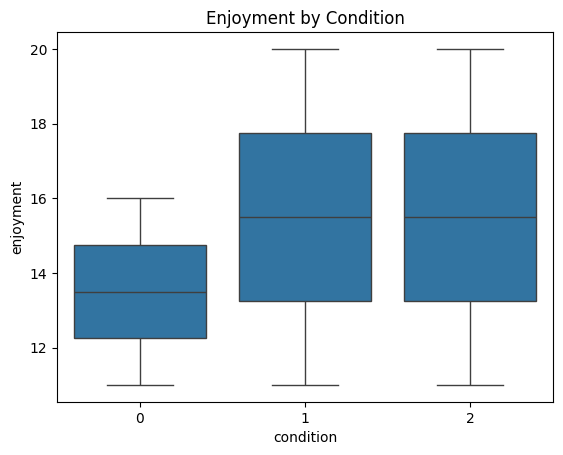

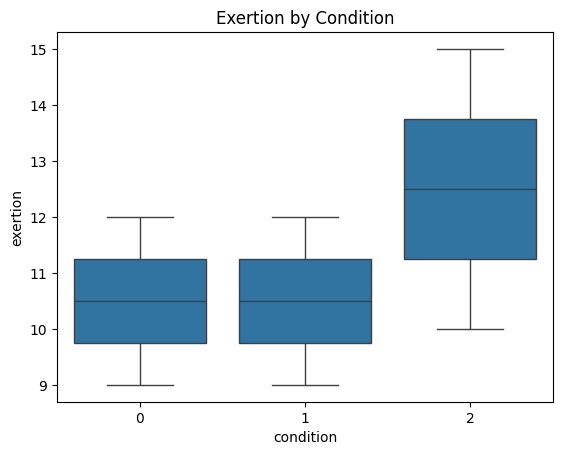

C:\Users\eason\AppData\Local\Temp\ipykernel_6524\48889913.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='condition', y='enjoyment', data=enjoyment_df, ci='sd')


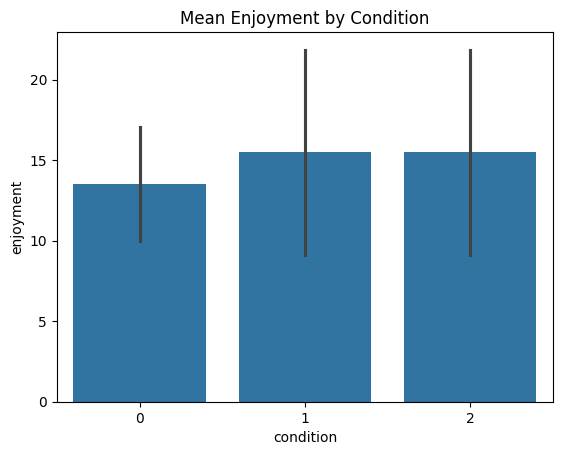

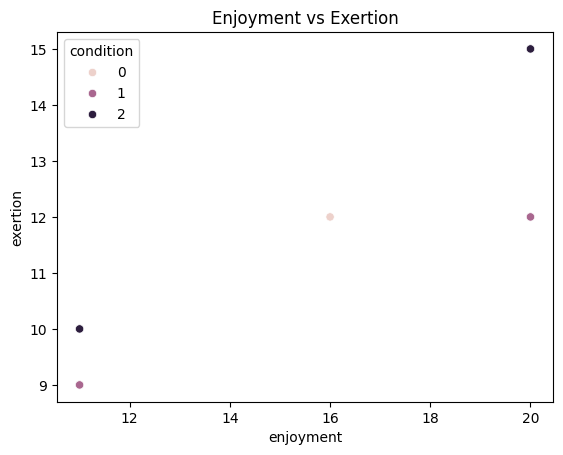

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='condition', y='enjoyment', data=enjoyment_df)
plt.title('Enjoyment by Condition')
plt.show()

sns.boxplot(x='condition', y='exertion', data=enjoyment_df)
plt.title('Exertion by Condition')
plt.show()

sns.barplot(x='condition', y='enjoyment', data=enjoyment_df, ci='sd')
plt.title('Mean Enjoyment by Condition')
plt.show()

sns.scatterplot(x='enjoyment', y='exertion', hue='condition', data=enjoyment_df)
plt.title('Enjoyment vs Exertion')
plt.show()